In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict,GridSearchCV,KFold,train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import joblib
from sklearn.svm import SVC,SVR

In [ ]:
df=pd.read_csv('Credict_card.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(37971, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,37971.000000,37971.000000,37971.000000,37971.000000,37971.000000,37971.000000,37971.000000,37971.000000,37971.000000,37971.000000,...,37970.000000,37970.000000,37970.000000,37970.000000,37970.000000,37970.000000,37970.000000,37970.000000,37970.000000,37970.000000
mean,24861.120487,-0.208291,0.059142,0.716720,0.192679,-0.224629,0.100189,-0.113969,0.036442,0.231837,...,-0.030218,-0.112454,-0.041314,0.006475,0.135943,0.021737,0.009232,0.003886,86.287635,0.002713
std,12540.176516,1.825882,1.543886,1.516624,1.404092,1.378959,1.306631,1.249370,1.232376,1.229913,...,0.760971,0.639246,0.549755,0.593849,0.435884,0.505412,0.385683,0.298667,233.832668,0.052013
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,14095.500000,-0.962429,-0.515159,0.238158,-0.715485,-0.828771,-0.639104,-0.595985,-0.154017,-0.545444,...,-0.238285,-0.535472,-0.178629,-0.327682,-0.128046,-0.331099,-0.063234,-0.007066,7.182500,0.000000
50%,29930.000000,-0.233044,0.107279,0.821283,0.188768,-0.262595,-0.158707,-0.073556,0.046081,0.106136,...,-0.079015,-0.086612,-0.052223,0.061018,0.175757,-0.063980,0.008575,0.021286,22.880000,0.000000
75%,35025.500000,1.161431,0.749274,1.451246,1.074201,0.299746,0.488730,0.435106,0.311373,0.955920,...,0.098257,0.298132,0.076470,0.398822,0.421184,0.300602,0.085628,0.075799,77.945000,0.000000
max,39190.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [ ]:
df.shape

(37971, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37971 entries, 0 to 37970
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37971 non-null  int64  
 1   V1      37971 non-null  float64
 2   V2      37971 non-null  float64
 3   V3      37971 non-null  float64
 4   V4      37971 non-null  float64
 5   V5      37971 non-null  float64
 6   V6      37971 non-null  float64
 7   V7      37971 non-null  float64
 8   V8      37971 non-null  float64
 9   V9      37971 non-null  float64
 10  V10     37971 non-null  float64
 11  V11     37970 non-null  float64
 12  V12     37970 non-null  float64
 13  V13     37970 non-null  float64
 14  V14     37970 non-null  float64
 15  V15     37970 non-null  float64
 16  V16     37970 non-null  float64
 17  V17     37970 non-null  float64
 18  V18     37970 non-null  float64
 19  V19     37970 non-null  float64
 20  V20     37970 non-null  float64
 21  V21     37970 non-null  float64
 22

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(37814, 31)

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df["Hour"]=df["Time"].apply(lambda x: np.ceil(float (x)/3600)%24)
df["Hour"]=df["Time"].astype("int")

0.0    37710
1.0      103
Name: Class, dtype: int64


Text(0, 0.5, 'Class')

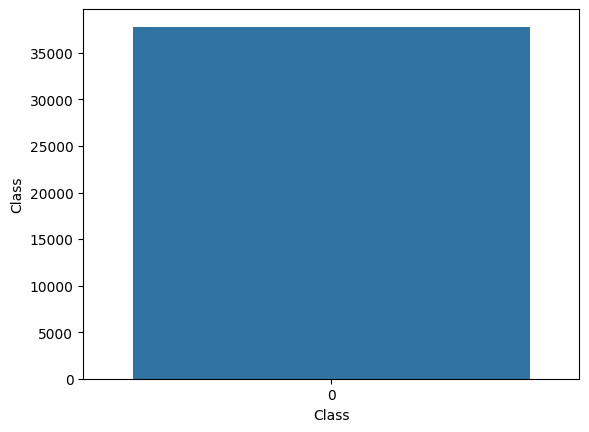

In [ ]:
print(df["Class"].value_counts())
sns.countplot(df["Class"])
plt.xlabel('Class')
plt.ylabel('Class')

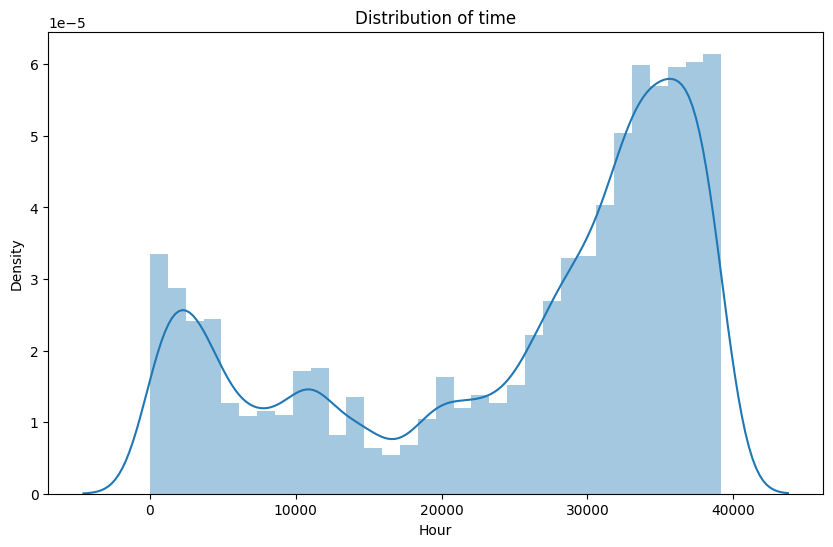

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Hour'])
plt.xlabel('Hour')
plt.ylabel('Density')
plt.title('Distribution of time')
plt.show()


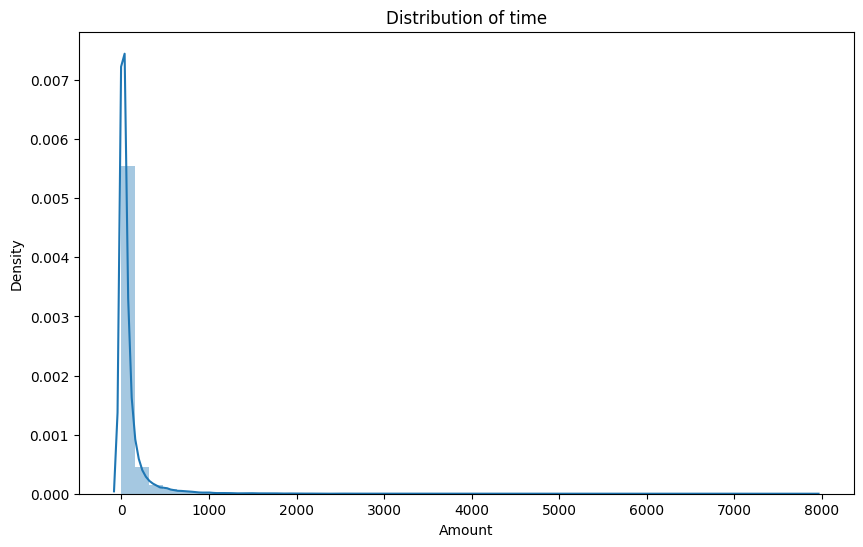

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of time')
plt.show()


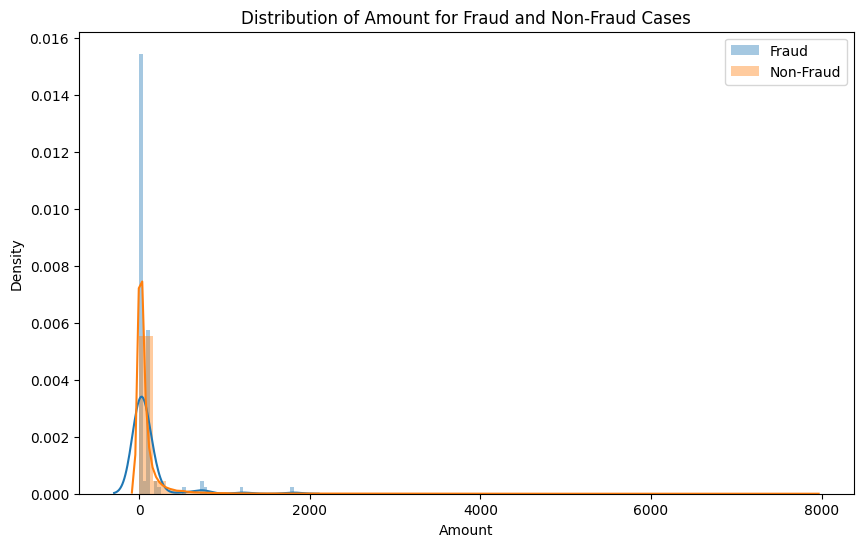

In [ ]:
fraud_cases = df[df['Class'] == 1]
non_fraud_cases = df[df['Class'] == 0]

plt.figure(figsize=(10, 6))
sns.distplot(fraud_cases['Amount'], label='Fraud')
sns.distplot(non_fraud_cases['Amount'], label='Non-Fraud')
plt.xlabel('Amount')
plt.legend()
plt.title('Distribution of Amount for Fraud and Non-Fraud Cases')
plt.show()

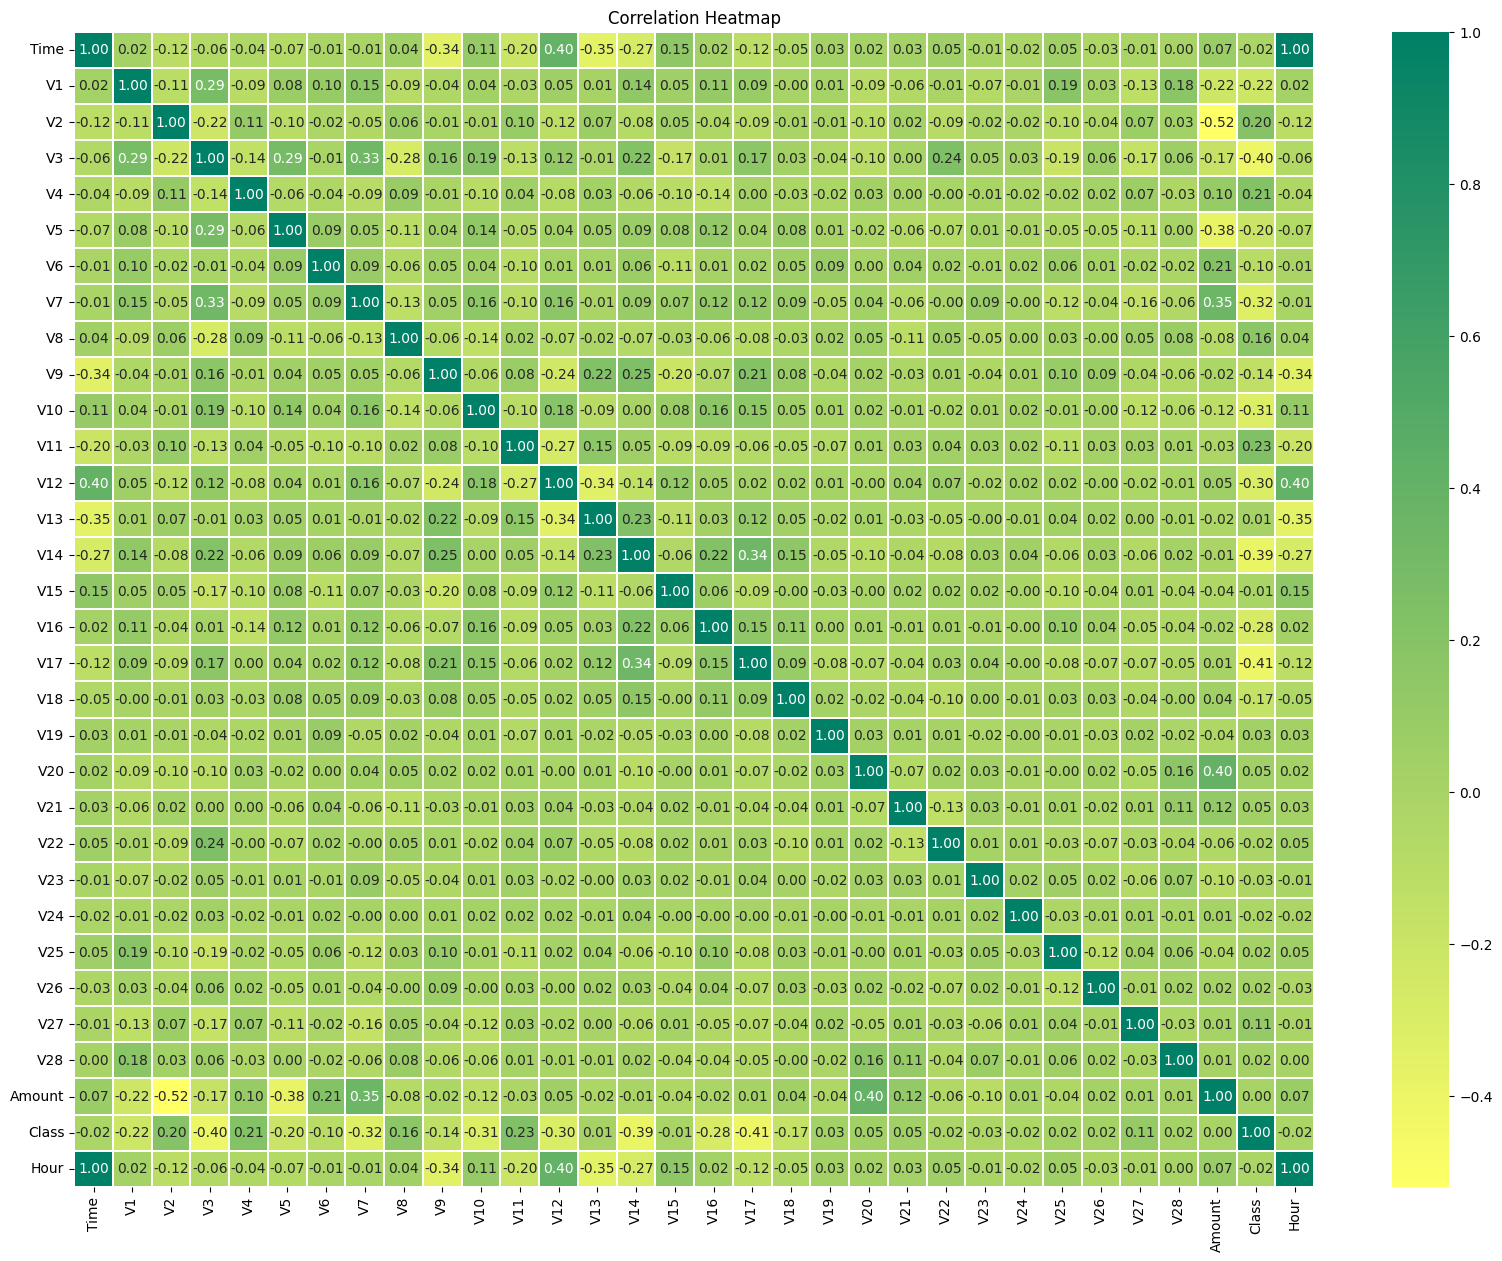

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='summer_r', annot=True, fmt='.2f', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

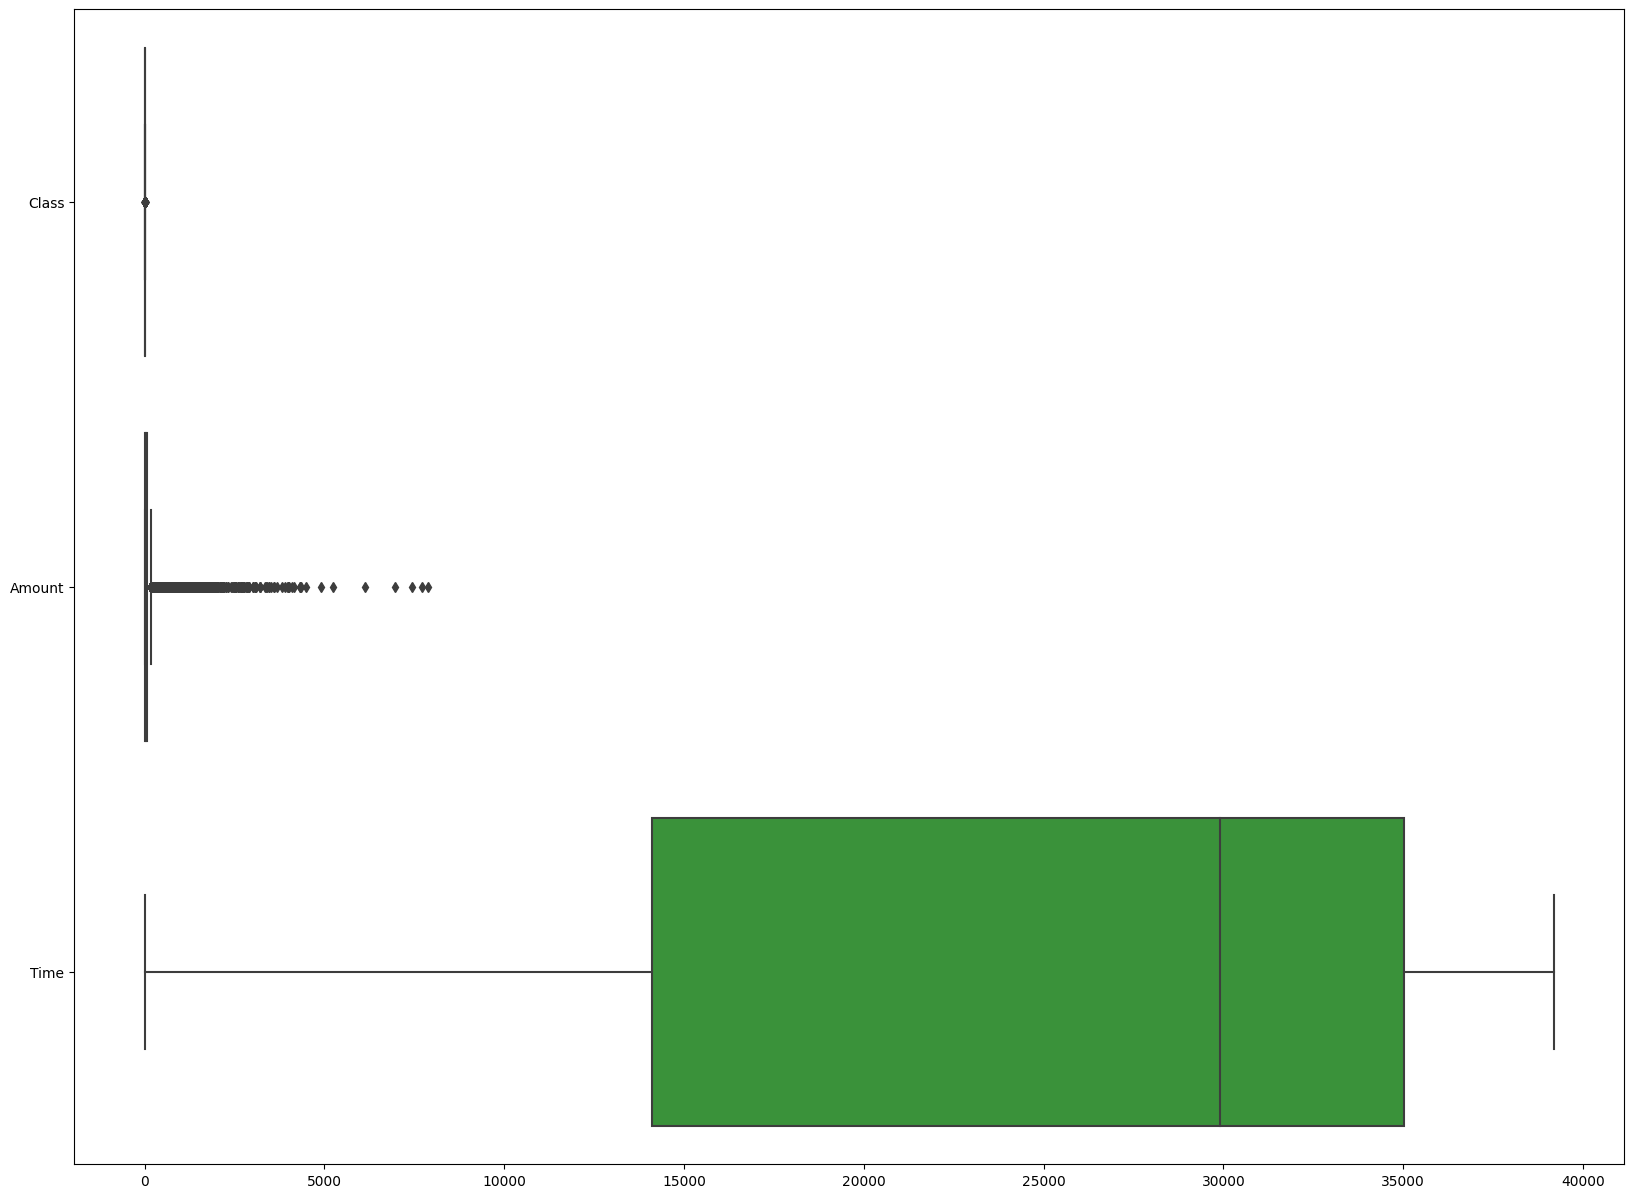

In [ ]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df[["Class","Amount","Time"]],orient="h")
plt.show()

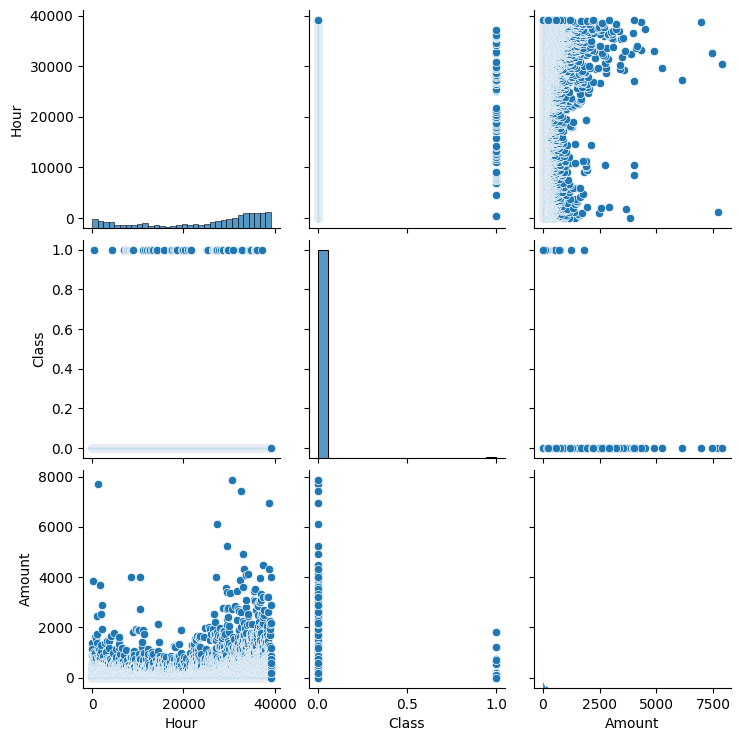

In [ ]:
sns.pairplot(df[['Hour','Class', 'Amount']], diag_kind="hist")

In [38]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

In [45]:
print(classification_report(y_test,y_pred))

NameError: ignored